In [1]:
import numpy as np
import pandas as pd
import time
from tqdm.notebook import tqdm

In [2]:
from NaverStockPriceDaily import *

In [3]:
stock = pd.DataFrame()

In [4]:
for i in tqdm(range(1, 11)):
    df = stockPriceDaily(ticker = '005930', page = i)
    stock = pd.concat(objs = [stock, df], ignore_index = True)
    time.sleep(1)

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   종가      100 non-null    float64
 2   전일비     100 non-null    float64
 3   시가      100 non-null    float64
 4   고가      100 non-null    float64
 5   저가      100 non-null    float64
 6   거래량     100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [6]:
stock.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,2022.10.20,55500.0,300.0,55200.0,56000.0,55100.0,15765663.0
1,2022.10.19,55800.0,700.0,56700.0,56900.0,55700.0,12660652.0
2,2022.10.18,56500.0,100.0,56700.0,57100.0,55800.0,14820702.0
3,2022.10.17,56600.0,300.0,55800.0,57000.0,55700.0,13641878.0
4,2022.10.14,56300.0,1100.0,56200.0,56500.0,55800.0,12924326.0


In [7]:
stock = stock.sort_values(by = ['날짜'])

In [8]:
stock.head()

,날짜,종가,전일비,시가,고가,저가,거래량
99,2022.05.25,66400.0,100.0,66700.0,67100.0,65900.0,15150490.0
98,2022.05.26,65900.0,500.0,66300.0,67200.0,65500.0,15970890.0
97,2022.05.27,66500.0,600.0,66700.0,66900.0,66200.0,11405555.0
96,2022.05.30,67700.0,1200.0,67500.0,67800.0,66900.0,14255484.0
95,2022.05.31,67400.0,300.0,67500.0,67500.0,66700.0,24365002.0


In [9]:
stock['날짜'] = stock['날짜'].astype(np.datetime64)

In [10]:
stock['종가1'] = stock['종가'].shift(1)

In [11]:
stock.head()

,날짜,종가,전일비,시가,고가,저가,거래량,종가1
99,2022-05-25,66400.0,100.0,66700.0,67100.0,65900.0,15150490.0,NaN
98,2022-05-26,65900.0,500.0,66300.0,67200.0,65500.0,15970890.0,66400.0
97,2022-05-27,66500.0,600.0,66700.0,66900.0,66200.0,11405555.0,65900.0
96,2022-05-30,67700.0,1200.0,67500.0,67800.0,66900.0,14255484.0,66500.0
95,2022-05-31,67400.0,300.0,67500.0,67500.0,66700.0,24365002.0,67700.0


In [12]:
stock['종가'].corr(stock['종가1'])

0.9676035500113065

In [13]:
stock['종가'].rolling(window = 3, min_periods = 1).mean()

99    66400.000000
98    66150.000000
97    66266.666667
96    66700.000000
95    67200.000000
          ...     
4     55766.666667
3     56033.333333
2     56466.666667
1     56300.000000
0     55933.333333
Name: 종가, Length: 100, dtype: float64

In [14]:
import seaborn as sns

C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from cu

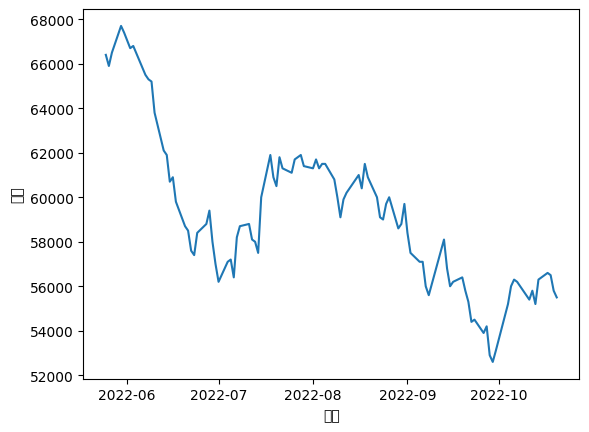

In [15]:
sns.lineplot(data = stock, x = '날짜', y = '종가');